### <center>San Jose State University<br>Department of Applied Data Science</center>
#  <center>DATA 220<br>Mathematical Methods for Data Analysis</center>
### <center>Fall 2020<br>Instructor: Ron Mak</center>
#  <center>MIDTERM EXAMINATION</center>
#### <center>Six problems, each worth 25 points, 150 points total.<br><br>Open book, notes, and internet. Individual work only!<br>Be sure to explain your work in comments or by printing intermediate results.<br>You can use Python code and any Python functions.<br>You can add your own functions or other support code.<br><br>Don't forget the 25 multiple-choice questions in Canvas!</center>

#### <strong>PROBLEM 1.</strong> What is the probability that a randomly selected leap year contains 53 Sundays?

Since a non-leap year has 52 weeks, it must have 52 Sundays. A leap year with 366 days has 366 - 7*52 = 2 extra days. There are how many possible pairs of consecutive days? How many of those pairs include a Sunday? We can solve this using the following Python code.

In [ ]:
first_day  = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
second_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Make a list of pairs of consecutive days.
pairs_list = zip(first_day, second_day)
pairs_count = len(first_day)

print(f'{pairs_count} possible pairs of consecutive days:')
print()

# Count how many pairs contain a Sunday.
sunday_count = 0;
for pair in pairs_list:
    print(pair, end='')
    
    if 'Sunday' in pair:
        sunday_count += 1
        print(' contains Sunday!', end='')

    print()
    
print()
print(f'{sunday_count} pairs include a Sunday')

p = sunday_count/pairs_count  # probability of the 53rd Sunday

print(f'Probability of including a Sunday = {p:.4f}')

#### <strong>PROBLEM 2.</strong> The first NASA mission to land men on the moon in July 1969 brought back 64 rock samples. The rock sample had an average weight of 172 ounces on Earth with a variance of 299 ounces squared. Scientists believe that the rock population on the lunar surface does not have a normal distribution. Nevertheless, find a 99% confidence interval for the mean weight of moon rocks.

The fact that the lunar rock population is not normal does not matter since with a sample size of 64, the Central Limit Theorem applies. From the standard normal table, we see that the critical value for z at the 99% confidence level is 2.58, or we can get that critical value by using the scipy.stats.norm.ppf function.

In [ ]:
import math
import scipy.stats as stats

n = 64                  # sample size
x_bar = 172             # sample mean
s = 299                 # sample variance
x_sigma = math.sqrt(s)  # x_sigma

level = 99                                  # confidence level
z_cv  = -stats.norm.ppf((1 - level/100)/2)  # z critical value

print(f'z critical value = {z_cv:.2f}')

interval = z_cv*(x_sigma/math.sqrt(n))
ci_lo    = x_bar - interval
ci_hi    = x_bar + interval

print(f'The {level}% confidence interval for the mean weight ' +
      f'of moon rocks is ({ci_lo:.2f}, {ci_hi:.2f})')

#### <strong>PROBLEM 3.</strong> Pirate Jack Sparrow buried a treasure chest on one of two islands, named Palau and Nauru. Historians had long believed that it was twice as likely that the treasure is buried on Palau than on Nauru. They've just discovered a map containing directions to find the treasure! But the map is faded, and only a single letter u of the island name is still legible. Does having the map change the probability that the treasure is buried on Palau? If so, how?

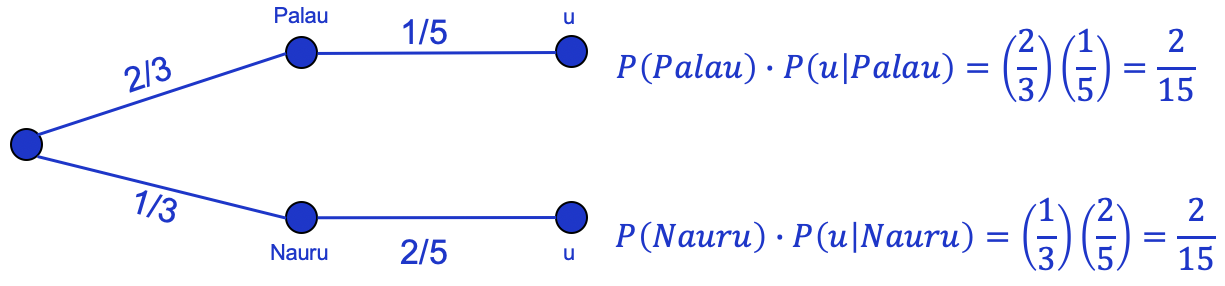

In [ ]:
p_palau = 2/3
p_nauru = 1/3

print(f'P(Palau)   = {p_palau:.4f}')
print(f'P(Nauru)   = {p_nauru:.4f}')

p_u_given_palau = 1/5
p_u_given_nauru = 2/5

print(f'P(u|Palau) = {p_u_given_palau:.4f}')
print(f'P(u|Nauru) = {p_u_given_nauru:.4f}')

p_u = p_palau*p_u_given_palau + p_nauru*p_u_given_nauru
print(f'P(u)       = {p_u:.4f}')

p_palau_given_u = (p_palau*p_u_given_palau)/p_u
print()
print(f'P(Palau|u) = {p_palau_given_u:.4f}')

#### <strong>PROBLEM 4.</strong> Accidents occur at a busy San Jose traffic intersection despite the traffic signals. Therefore, the city installed an automatic camera to photograph cars that run through red lights. After several days, the police calculated that the average number of violations per hour is 3.7. What is the probability that there will be no more than two violations during the next hour?

This is a Poisson distribution problem. Use the scipy.stats.poisson.pmf probability mass function to add the probabilities that 0, 1, or 2 violations can occur.

In [ ]:
import scipy.stats as stats

avg_violations = 3.7
total = 0

for v in range(0, 3):
    p = stats.poisson.pmf(v, avg_violations)
    total += p;
    
    print(f'P({v} violations) = {p:.3f}')
    
print()
print(f'P(no more than 2 violations) = {total:.3f}')
    

#### <strong>PROBLEM 5.</strong> In an exclusive Silicon Valley neighborhood, the selling prices of homes follow a normal distribution with mean \\$2,760,000 and standard deviation \\$320,000. What is the probability that the next home will sell for between \\$2,500,000 and \\$3,200,000?

In [ ]:
hi_price = 3_200_000
lo_price = 2_500_000
mean     = 2_760_000
sigma    =   320_000

# We need to find the area under the normal curve between $2,500,000 and $3,200,000. 
# To use the standard normal table, first calculate the z scores for 2,500,000 and 3,200,000. 

zlo = (lo_price - mean)/sigma
zhi = (hi_price - mean)/sigma

print(f'zlo = {zlo:5.2f}')
print(f'zhi = {zhi:5.2f}')

In [ ]:
# From the standard normal table:
# P(-0.81 < z < 2.31) = P(z < 1.38) - P(z < -0.81) = 0.91621 - 0.20897

p = 0.91621 - 0.20897
print(f'probability = {p:.4f}')

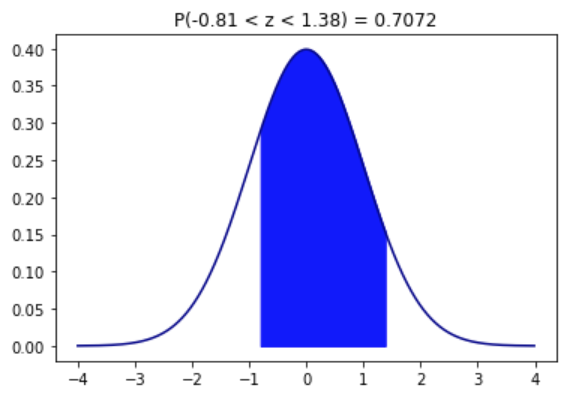

In [ ]:
# Of course, we could have solved this simply by calling the right Python functions.

import scipy.stats

hi_price = 3_200_000
lo_price = 2_500_000
mean     = 2_760_000
sigma    =   320_000

distrib = scipy.stats.norm(mean, sigma);
p = distrib.cdf(hi_price) - distrib.cdf(lo_price)
print(f'probability = {p:.4f}')

#### <strong>PROBLEM 6.</strong> Suppose you have four cats named Al, Betty, Cindy, and Dan, and four cat food bowls labeled 1, 2, 3, and 4. Each bowl can hold up to twelve units of food and each cat chooses a separate bowl, but it doesn't matter which cat uses which bowl. For their dinner each day, you put twelve units of cat food into the bowls using a scoop that holds exactly one unit, so each bowl will receive a whole number units of food. In 95% of the days, some of your cats are equally hungry, so you can put the same amount of food into some of the bowls. In only 10% of the days, one or more cats aren't hungry and therefore you can leave some bowls empty. If you always put out the full twelve units of food each day, how many ways can you distribute the food among the four bowls?

To solve this problem, you must first do a bit of data wrangling to weed out extraneous data. The question is how many ways to distribute food among the four bowls. Since the bowls are labeled, they are distinct. The names of the cats is immaterial. The information about 95% and 10% days tells you that it's possible to have bowls with the same amount of food and empty bowls, but the percentages are otherwise immaterial.

Use a dot to represent one unit of food and a bar to separate the bowls. For example, ...|....|..|... represents 3 units in bowl \#1, 4 units in bowl \#2, 2 units in bowl \#3, and 3 units in bowl \#4. Also, ....||....|.... represents 4 units each in bowls \#1, \#3, and \#4, and no units in bowls \#2.

Therefore, the problem reduces to how many ways to arrange the 12 dots and 3 bars. This is similar to the fruit salad problem.

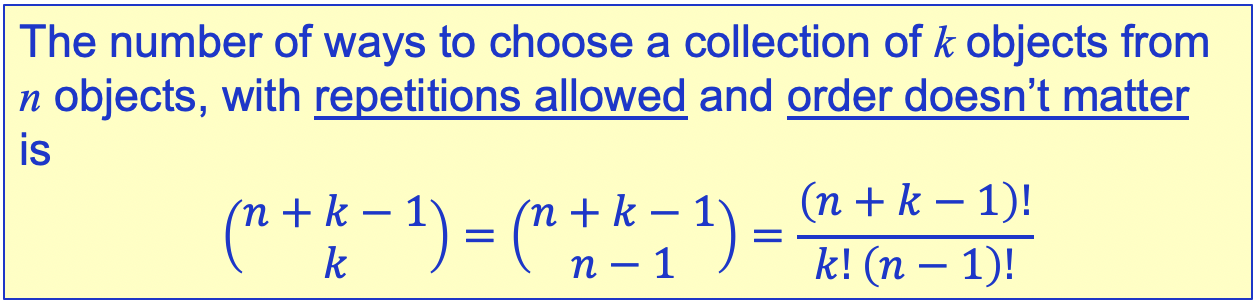

In [ ]:
import scipy.special

n = 4   # number of bowls
k = 12  # number of food units

solution1 = int(scipy.special.binom(n+k-1, k))
solution2 = int(scipy.special.binom(n+k-1, n-1))

print(f'solution1 = {solution1} ways')
print(f'solution2 = {solution2} ways')